In [114]:
#Расширим функционал класса, который был описан в прошлой лабораторной.
class Acceptor:
  def __init__(self, alphabet, states, initialState, endState):
    self.alphabet = set(alphabet)
    self.states = states
    self.initialState = initialState
    self.endState = set(endState)

  def accept(self, input): 
    state = self.initialState
    for char in input:
      if (char in self.alphabet) == False:
        return False        
      state = states[state][char]
    if (state in self.endState) == True:
      return True
    else:
      return False

  #Создадим новый метод, который будет удалять лишние состояния
  def removeInaccessible(self):
    #Есть три варианта, когда состояние будет недоступным:
    #Символ присутствует в алфавите, но не используется в словаре
    #Выписываем все символы из словаря в множество и сравниваем с алфавитом
    #Так как акцептор детерминирован, то каждый символ должен встречаться в каждом состоянии
    #А значит можно составить множество из любого одного состояния
    row = set(self.states[0].keys())
    self.alphabet = self.alphabet - self.alphabet.difference(row)
    #Аналогичным образом удаляются и состояния, доступные через символы, которых нет в алфавите
    diff = list(row.difference(self.alphabet))
    #Составляется список разности множеств, и элементы удаляются из каждого состояния.
    if (len(diff)>0):
      for state in range(len(self.states)):
        for char in diff:
          self.states[state].pop(char)
    #Последним вариантом недоступного состояния будет кго изоляция
    #То есть, в состояние невозможно перейти из начального состояния
    visited = set()
    unchecked = set({self.initialState})
    #Составляется множетсво всех состояний, в которые можно попасть по какому-либо пути из начального
    while (1):
      if (len(unchecked) == 0):
        break;
      tmp = list(unchecked)
      visited.add(tmp[0])
      unchecked.remove(tmp[0])
      unchecked.update(set(states[tmp[0]].values()).difference(visited))
    #Если этот список короче, чем количество состояний, то отсутствующие состояния можно удалить
    if (len(visited) != len(self.states)):
      for key in list(states.keys()):
        if (key in visited) == False:
          states.pop(key)
    #Следует заметить, что также возможны недостижимые значения при переходе в несуществующее состояние
    #Но при их удалении акцептор перестает быть детерминированным, поэтому предполагаем, что 
    #акцептор задан корректно

alphabet = {'1', '0', 'a', 'b', 'c'}

states = {0:{'0':0, '1':1, 'a':0, 'd':1, 'e':1},
       1:{'0':0, '1':2, 'a':1, 'd':1, 'e':1},
       2:{'0':1, '1':2, 'a':4, 'd':1, 'e':1},
       3:{'0':5, '1':5, 'a':5, 'd':1, 'e':1},
       4:{'0':0, '1':0, 'a':0, 'd':0, 'e':0},
       5:{'0':6, '1':6, 'a':6, 'd':1, 'e':1},
       6:{'0':4, '1':3, 'a':3, 'd':1, 'e':1}}

initialState = 0

endState = {4}

acceptor = Acceptor(alphabet, states, initialState, endState)

acceptor.removeInaccessible()

print(acceptor.states)
print(acceptor.alphabet)

{0: {'0': 0, '1': 1, 'a': 0}, 1: {'0': 0, '1': 2, 'a': 1}, 2: {'0': 1, '1': 2, 'a': 4}, 4: {'0': 0, '1': 0, 'a': 0}}
{'1', 'a', '0'}


Проверим класс на таком акцепторе: 
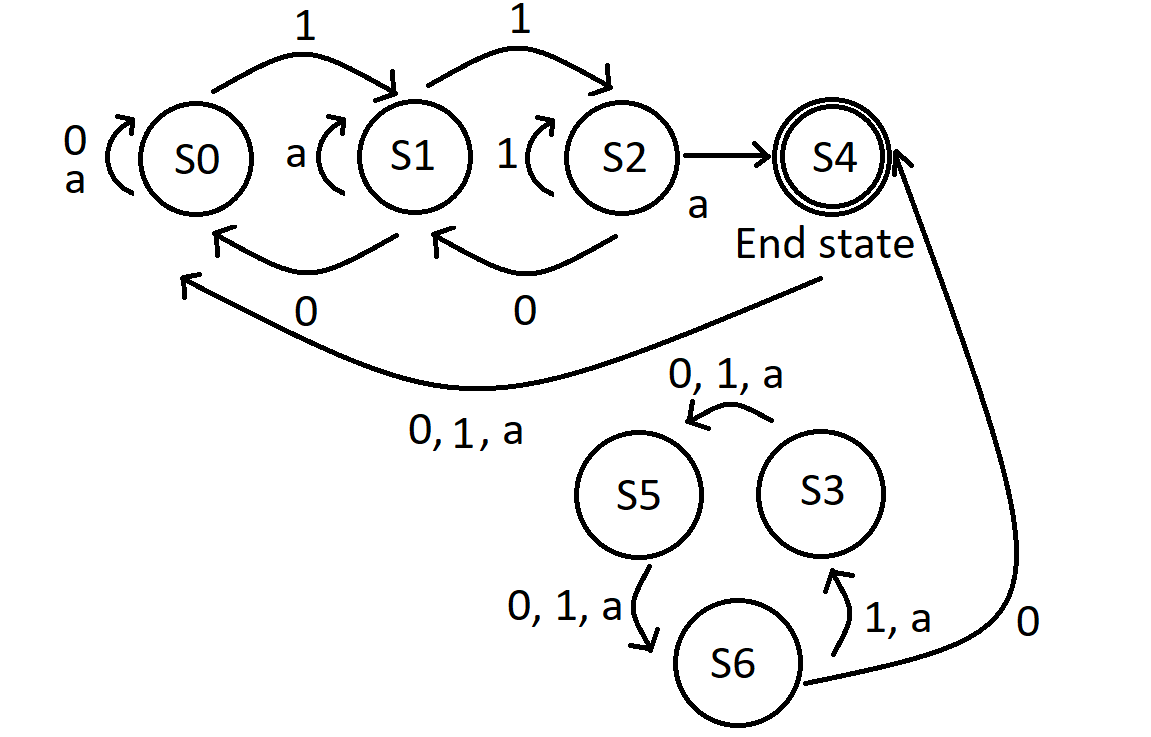

In [115]:
#Зададим алфавит с символами, которые не встречаются в словаре
alphabet = {'1', '0', 'a', 'b', 'c'}

#И словарь с символами, которые не встречаются в алфавите
states = {0:{'0':0, '1':1, 'a':0, 'd':1, 'e':1},
       1:{'0':0, '1':2, 'a':1, 'd':1, 'e':1},
       2:{'0':1, '1':2, 'a':4, 'd':1, 'e':1},
       3:{'0':5, '1':5, 'a':5, 'd':1, 'e':1},
       4:{'0':0, '1':0, 'a':0, 'd':0, 'e':0},
       5:{'0':6, '1':6, 'a':6, 'd':1, 'e':1},
       6:{'0':4, '1':3, 'a':3, 'd':1, 'e':1}}

#Кроме того, можно заметить, что если начинать в том же состоянии S0, то 
#состояния S3, S5, S6 не являются достижимыми
initialState = 0

endState = {4}

acceptor = Acceptor(alphabet, states, initialState, endState)
#Проверим функцию
acceptor.removeInaccessible()

print(acceptor.states) #Остается всего 4 состояния
print(acceptor.alphabet)

{0: {'0': 0, '1': 1, 'a': 0}, 1: {'0': 0, '1': 2, 'a': 1}, 2: {'0': 1, '1': 2, 'a': 4}, 4: {'0': 0, '1': 0, 'a': 0}}
{'1', 'a', '0'}


In [118]:
#Зададим еще один аналогичный автомат, но уже без разницы в словаре и алфавите
alphabet = {'1', '0', 'a'}
states = {0:{'0':0, '1':1, 'a':0},
       1:{'0':0, '1':2, 'a':1},
       2:{'0':1, '1':2, 'a':4},
       3:{'0':5, '1':5, 'a':5},
       4:{'0':0, '1':0, 'a':0},
       5:{'0':6, '1':6, 'a':6},
       6:{'0':4, '1':3, 'a':3}}
#Но при этом начальное состояние будет, к примеру S3
initialState = 3
endState = {4}
acceptor1 = Acceptor(alphabet, states, initialState, endState)
acceptor1.removeInaccessible()
print(acceptor1.states) #Все состояния достижимы
print(acceptor1.alphabet)

{0: {'0': 0, '1': 1, 'a': 0}, 1: {'0': 0, '1': 2, 'a': 1}, 2: {'0': 1, '1': 2, 'a': 4}, 3: {'0': 5, '1': 5, 'a': 5}, 4: {'0': 0, '1': 0, 'a': 0}, 5: {'0': 6, '1': 6, 'a': 6}, 6: {'0': 4, '1': 3, 'a': 3}}
{'1', 'a', '0'}
